In [17]:
#Import section
import os
import sys
import math
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [18]:
def euclidean_dist(a,b):
    x1,y1=a[0],a[1]
    x2,y2=b[0],b[1]
    return(math.sqrt(((x2-x1)**2)+(y2-y1)**2))

In [19]:
df_latlong=pd.read_csv("500 us city coordinates.txt",delimiter="\t",header=None)
coordinates=[]
file=open("500 us city coordinates.txt",'r')
for lines in file:
    coordinates.append([float(lines.split()[0]),float(lines.split()[1])])

In [20]:
distance_cost=[]
for i in range(len(coordinates)):
    temp={}
    for j in range(len(coordinates)):
        if i==j:
            pass
        temp[j]=euclidean_dist(coordinates[i],coordinates[j])
    distance_cost.append(temp)

In [21]:
def facility_cost(S,cities):
    facility_indication=-1
    cost=0
    assignment=[]
    for i in range(len(cities)):
        min_cost=sys.float_info.max
        for j in S:
            if i not in S:
                if distance_cost[i][j]<min_cost:
                    facility_indication=j
                    min_cost=distance_cost[i][j]
        if min_cost!=sys.float_info.max:
            cost+=min_cost
            assignment.append((i,facility_indication))
    return cost,assignment
    

In [49]:
# Start the algorithm with random k points as centers
S=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
# S=[20]
k=len(S)

In [50]:
cost,assignment=facility_cost(S,coordinates)
assignment_dict={}
for i in assignment:
    if i[1] not in assignment_dict:
        assignment_dict[i[1]]=distance_cost[i[0]][i[1]]
    elif i[1] in assignment_dict:
        if distance_cost[i[0]][i[1]]>assignment_dict[i[1]]:
            assignment_dict[i[1]]=distance_cost[i[0]][i[1]]
        else:
            pass

# len(assignment)

The objective cost for intial k= 20 random centers is  1014.9096774432268


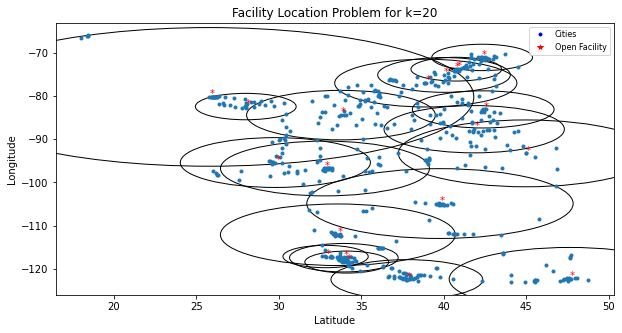

In [51]:
print("The objective cost for intial k=",k, "random centers is ",cost)
legend_elements = [Line2D( [0],[0],marker='o', color='w', label='Cities',markerfacecolor='b', markersize=5),
                    Line2D( [0],[0],marker='*', color='w', label='Open Facility',markerfacecolor='r', markersize=10)]


x=list(df_latlong[0])
y=list(df_latlong[1])
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(x,y,'.',linewidth='.5')
for i in S:
    plt.annotate(str('*'),xy=(x[i],y[i]),color='red')
    radius=assignment_dict[i]
    circle=plt.Circle((x[i],y[i]),radius,fill=False)
    ax.add_artist(circle)
    
plt.title("Facility Location Problem for k="+str(k))
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Longitude",fontsize=10)
plt.legend(handles=legend_elements, loc='upper right',prop={"size":8})
plt.savefig(str(os.getcwd())+"/"+"Befrore 1 swap"+".png")
plt.show()

In [52]:
# 1 Swap implementation
original_centers=S.copy()
new_centers=S.copy()
for i in range(len(S)):
    for j in range(len(coordinates)):
        if j not in S:
#             print("here1")
            org_cost,org_assign=facility_cost(original_centers,coordinates)
            
            new_center_var=new_centers[i]
            new_centers[i]=j
            
            new_cost,new_assign=facility_cost(new_centers,coordinates)
            
            if new_cost<=(.99*org_cost):
#                 print("here2")
                original_centers[i]=j
            else:
                new_centers[i]=new_center_var
# temp_centers
            
   

In [53]:
swap_cost,swap_assignment=facility_cost(new_centers,coordinates)
print("Centers before 1 swap",S)
print("Centers after 1 swap",new_centers)
k=len(new_centers)

Centers before 1 swap [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Centers after 1 swap [33, 2, 130, 4, 37, 43, 60, 8, 9, 10, 11, 12, 13, 278, 15, 16, 17, 431, 19, 20]


The objective cost for intial k= 20 random centers is  808.0329538731157


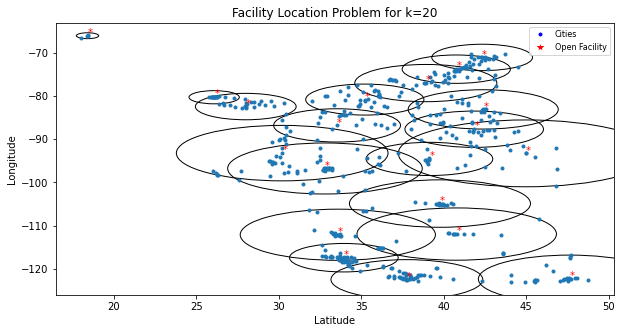

In [55]:
print("The objective cost for intial k=",k, "random centers is ",swap_cost)

new_assignment_dict={}
for i in swap_assignment:
    if i[1] not in new_assignment_dict:
        new_assignment_dict[i[1]]=distance_cost[i[0]][i[1]]
    elif i[1] in new_assignment_dict:
        if distance_cost[i[0]][i[1]]>new_assignment_dict[i[1]]:
            new_assignment_dict[i[1]]=distance_cost[i[0]][i[1]]
        else:
            pass

legend_elements = [Line2D( [0],[0],marker='o', color='w', label='Cities',markerfacecolor='b', markersize=5),
                    Line2D( [0],[0],marker='*', color='w', label='Open Facility',markerfacecolor='r', markersize=10)]


x=list(df_latlong[0])
y=list(df_latlong[1])
fig,ax=plt.subplots(figsize=(10,5))
plt.plot(x,y,'.',linewidth='.5')
for i in new_centers:
    plt.annotate(str('*'),xy=(x[i],y[i]),color='red')
    radius=new_assignment_dict[i]
    circle=plt.Circle((x[i],y[i]),radius,fill=False)
    ax.add_artist(circle)

plt.title("Facility Location Problem for k="+str(k))
plt.xlabel("Latitude",fontsize=10)
plt.ylabel("Longitude",fontsize=10)
plt.legend(handles=legend_elements, loc='upper right',prop={"size":8})
plt.savefig(str(os.getcwd())+"/"+"After 1 swap"+".png")
plt.show()